In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
PATH = 'results/run_1_no_fc/'
# PATH = '/tmp/AEP/logs/'
N_PARTICIPANTS=64

In [57]:
participant = np.genfromtxt(PATH + 'participant/observer.txt', delimiter=' ')
precise_oldest = np.genfromtxt(PATH + 'precise_oldest/observer.txt', delimiter=' ')
precise_newest = np.genfromtxt(PATH + 'precise_newest/observer.txt', delimiter=' ')
scuttle_depth = np.genfromtxt(PATH + 'scuttle_depth/observer.txt', delimiter=' ')
scuttle_breadth = np.genfromtxt(PATH + 'scuttle_breadth/observer.txt', delimiter=' ')
# precise_oldest = np.genfromtxt(PATH + 'precise_oldest_fc/observer.txt', delimiter=' ')
# precise_newest = np.genfromtxt(PATH + 'precise_newest_fc/observer.txt', delimiter=' ')
# scuttle_depth = np.genfromtxt(PATH + 'scuttle_depth_fc/observer.txt', delimiter=' ')
# scuttle_breadth = np.genfromtxt(PATH + 'scuttle_breadth_fc/observer.txt', delimiter=' ')


In [58]:
ts = len(scuttle_depth[0])

In [59]:
def plot_thr(traces, path, x_lim=(0, 20), y_lim=None, dim=(15, 6), title="Figure", y_label="None"):
    figure = plt.figure(figsize=dim, dpi=80)
    ax = figure.add_subplot(111)

    # Plot all traces with given parameters
    for (y, x, trace_name, marker, ls) in traces:
        ax.plot(x, y, label=trace_name, marker=marker, linestyle=ls)

    ax.legend(shadow=True, loc='upper right', frameon=False,
              fontsize='large')
    # ax.set_title('Throughput', fontsize=20, y=1.02)
    ax.set_xlabel('Time (Seconds)', fontsize=12,
                  labelpad=10)
    ax.set_ylabel(y_label, fontsize=12,
                  labelpad=10)
    ax.tick_params(axis='both', which='major', labelsize=12)

    if (y_lim is not None):
        ax.set_ylim(y_lim)
    # ax.set_xlim(x_lim)

    # ax.grid(True)

    # Save plot with multiple formats
    figure.savefig(path, bbox_inches='tight')
#     plt.title(title)
    plt.show(figure)
    plt.close(figure)

In [60]:
# parameters of each trace:
#         1: y data
#         2: x data
#         3: legend name
#         4: trace marker (',', '>', 's', 'x', 'o', 'd', '<')
#         5: trace type ['solid', 'dashed', 'dashdot', 'dotted']
# traces = [
#     (max_stale, list(range(0, ts)), "precise-newest", "x", "solid"),
#     (max_stale, list(range(0, ts)), "scuttle-breadth", "x", "solid"),
#     ...
# ]

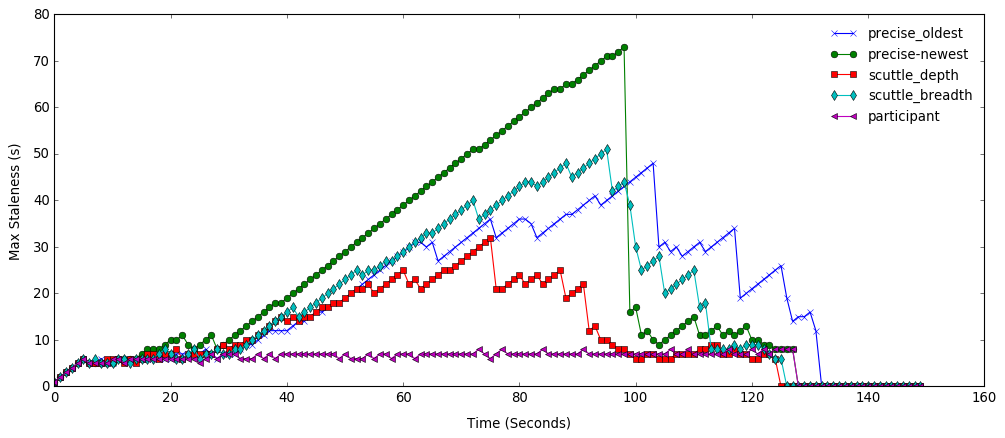

In [61]:
traces = [
    (precise_oldest[0], list(range(0, ts)), "precise_oldest", "x", "solid"),
    (precise_newest[0], list(range(0, ts)), "precise-newest", "o", "solid"),
    (scuttle_depth[0], list(range(0, ts)), "scuttle_depth", "s", "solid"),
    (scuttle_breadth[0], list(range(0, ts)), "scuttle_breadth", "d", "solid"),
#     (precise_oldest_fc[0], list(range(0, ts)), "precise_oldest_fc", "x", "dashed"),
#     (precise_newest_fc[0], list(range(0, ts)), "precise-newest_fc", "o", "dashed"),
#     (scuttle_depth_fc[0], list(range(0, ts)), "scuttle_depth_fc", "s", "dashed"),
#     (scuttle_breadth_fc[0], list(range(0, ts)), "scuttle_breadth_fc", "d", "dashed")
    (participant[0], list(range(0, ts)), "participant", "<", "solid")
]
plot_thr(traces, path="./max_staleness.eps", x_lim=(0, ts), title="Max Staleness", y_label="Max Staleness (s)")

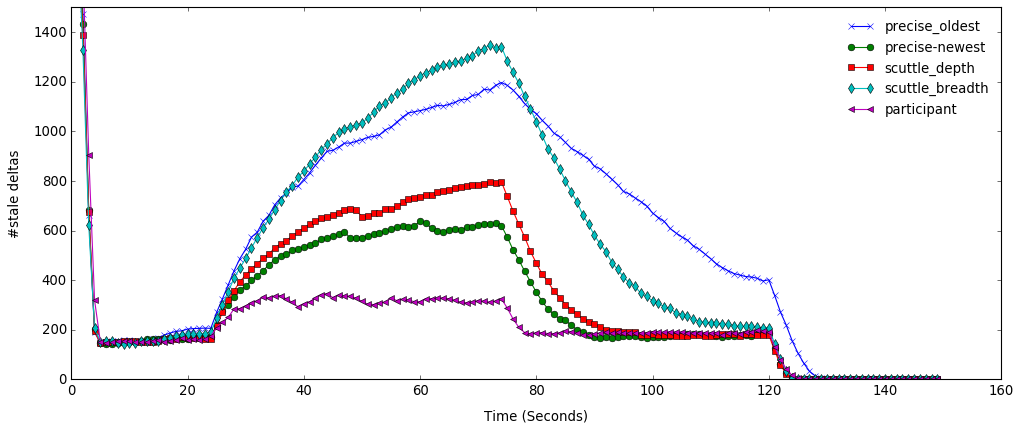

In [62]:
traces = [
    (precise_oldest[1], list(range(0, ts)), "precise_oldest", "x", "solid"),
    (precise_newest[1], list(range(0, ts)), "precise-newest", "o", "solid"),
    (scuttle_depth[1], list(range(0, ts)), "scuttle_depth", "s", "solid"),
    (scuttle_breadth[1], list(range(0, ts)), "scuttle_breadth", "d", "solid"),
#     (precise_oldest_fc[1], list(range(0, ts)), "precise_oldest_fc", "x", "dashed"),
#     (precise_newest_fc[1], list(range(0, ts)), "precise-newest_fc", "o", "dashed"),
#     (scuttle_depth_fc[1], list(range(0, ts)), "scuttle_depth_fc", "s", "dashed"),
#     (scuttle_breadth_fc[1], list(range(0, ts)), "scuttle_breadth_fc", "d", "dashed")
            (participant[1], list(range(0, ts)), "participant", "<", "solid")
]
plot_thr(traces, path="./num_staleness.eps", x_lim=(0, ts), title="Num Staleness", y_label="#stale deltas", y_lim=(0, 1500))

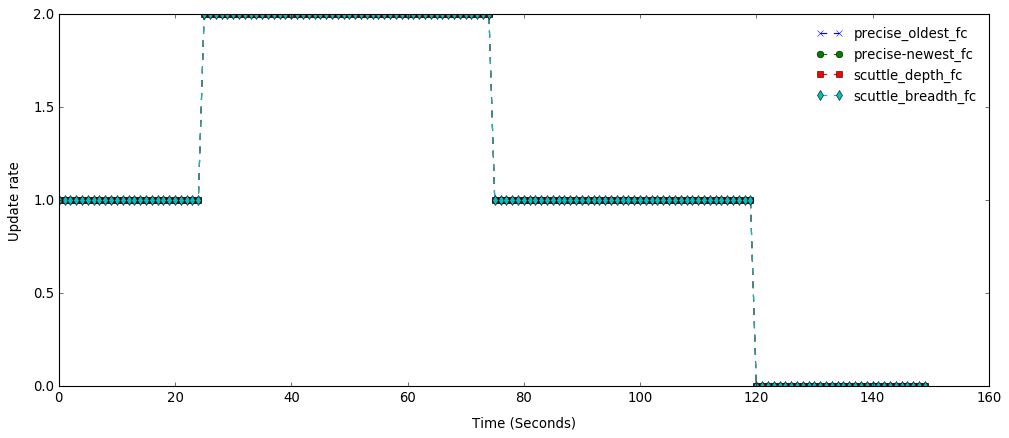

In [63]:
traces = [
    (precise_oldest[2], list(range(0, ts)), "precise_oldest_fc", "x", "dashed"),
    (precise_newest[2], list(range(0, ts)), "precise-newest_fc", "o", "dashed"),
    (scuttle_depth[2], list(range(0, ts)), "scuttle_depth_fc", "s", "dashed"),
    (scuttle_breadth[2], list(range(0, ts)), "scuttle_breadth_fc", "d", "dashed")
]
plot_thr(traces, path="./update_rate.eps", x_lim=(0, ts), title="Update Rate", y_label="Update rate")

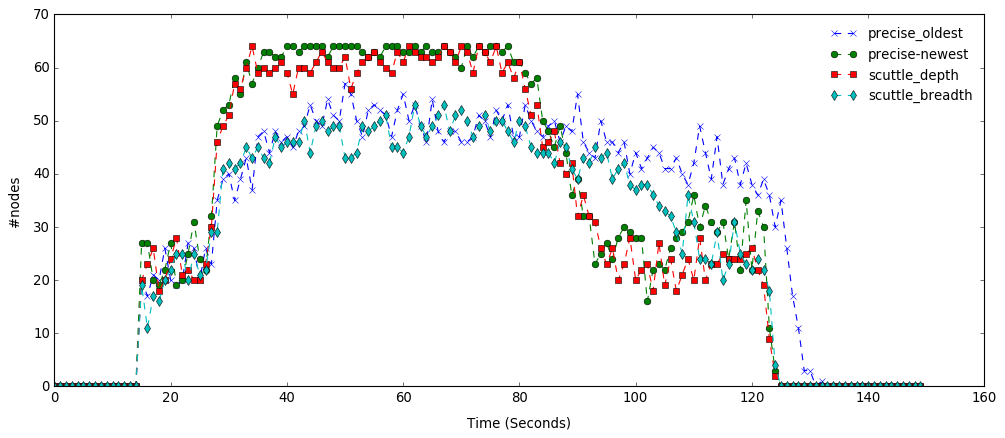

In [64]:
traces = [
    (precise_oldest[3], list(range(0, ts)), "precise_oldest", "x", "dashed"),
    (precise_newest[3], list(range(0, ts)), "precise-newest", "o", "dashed"),
    (scuttle_depth[3], list(range(0, ts)), "scuttle_depth", "s", "dashed"),
    (scuttle_breadth[3], list(range(0, ts)), "scuttle_breadth", "d", "dashed")
]
plot_thr(traces, path="./bigger_mtu.eps", x_lim=(0, ts), title="Number of nodes with messages bigger than MTU", y_label="#nodes")

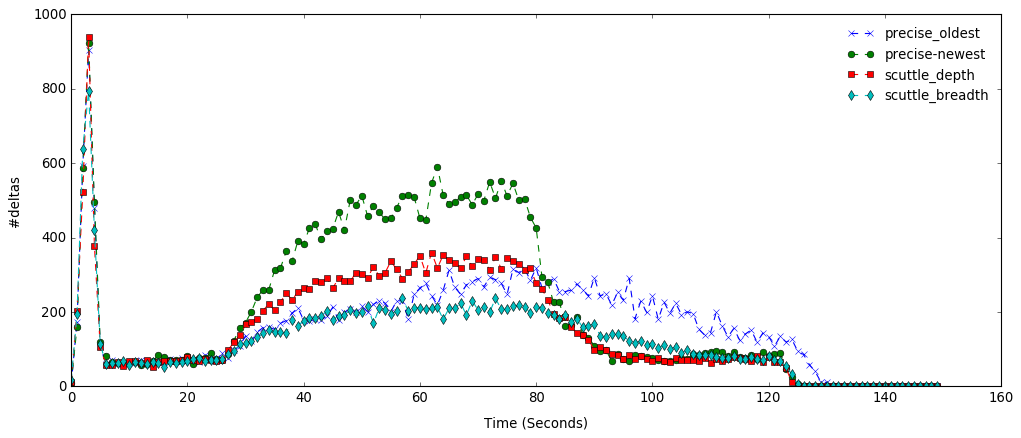

In [65]:
traces = [
    (precise_oldest[4]/N_PARTICIPANTS, list(range(0, ts)), "precise_oldest", "x", "dashed"), 
    (precise_newest[4]/N_PARTICIPANTS, list(range(0, ts)), "precise-newest", "o", "dashed"),
    (scuttle_depth[4]/N_PARTICIPANTS, list(range(0, ts)), "scuttle_depth", "s", "dashed"),
    (scuttle_breadth[4]/N_PARTICIPANTS, list(range(0, ts)), "scuttle_breadth", "d", "dashed")
]
plot_thr(traces, path="./number_of_deltas.eps", x_lim=(0, ts), title="Number of deltas exchanged", y_label="#deltas")